<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Trabalho_Edeq_Vers%C3%A3o_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

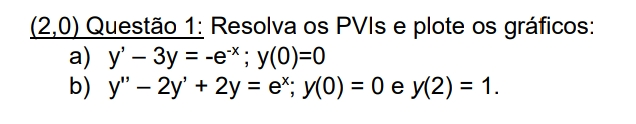

QUESTÃO 1: RESOLUÇÃO DE PVIs CORRIGIDA

1a) y' - 3y = -e^{-x}; y(0)=0

1b) y'' - 2y' + 2y = e^x; y(0)=0, y(2)=1


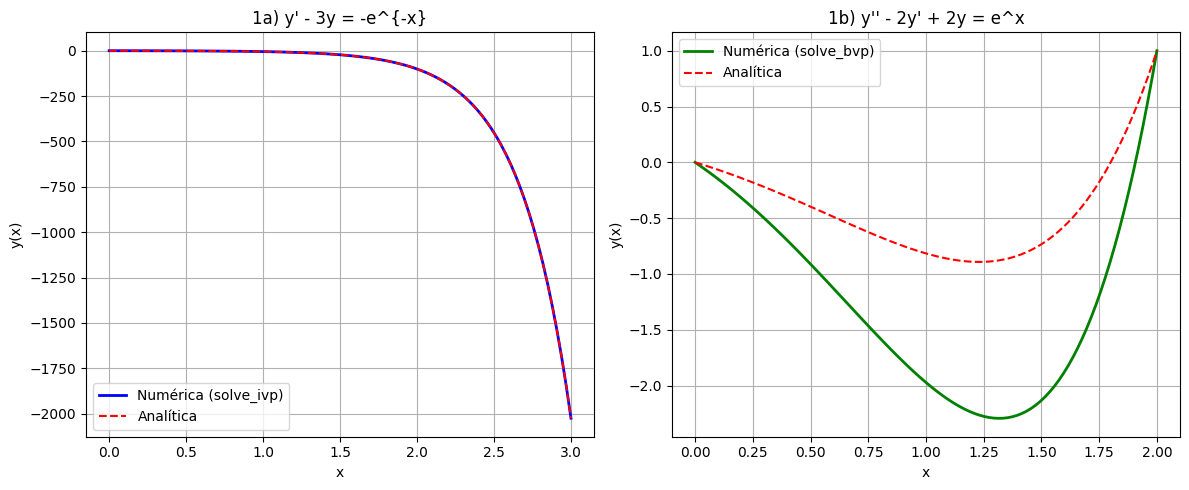

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp

print("QUESTÃO 1: RESOLUÇÃO DE PVIs CORRIGIDA")

# ===============================================================
# Item 1a) y' - 3y = -e^{-x}; y(0)=0
# ===============================================================

print("\n1a) y' - 3y = -e^{-x}; y(0)=0")

def edo1a(x, y):
    return 3*y - np.exp(-x)  # CORRIGIDO

x_span1a = [0, 3]
x_eval1a = np.linspace(0, 3, 100)
sol1a = solve_ivp(edo1a, x_span1a, [0], t_eval=x_eval1a, method='RK45')

# Solução analítica correta
# y' - 3y = -e^{-x}  →  y(x) = (1/4)(e^{-x} - e^{3x})
def sol_analitica1a(x):
    return 0.25 * (np.exp(-x) - np.exp(3*x))

# ===============================================================
# Item 1b) y'' - 2y' + 2y = e^x; y(0)=0, y(2)=1
# ===============================================================

print("\n1b) y'' - 2y' + 2y = e^x; y(0)=0, y(2)=1")

def edo1b(x, y):
    return [y[1], 2*y[1] - 2*y[0] + np.exp(x)]

def boundary_conditions1b(ya, yb):
    return [ya[0] - 0, yb[0] - 1]

x_eval1b = np.linspace(0, 2, 100)
y_init_guess = np.zeros((2, x_eval1b.size))
sol1b = solve_bvp(edo1b, boundary_conditions1b, x_eval1b, y_init_guess)

# Solução analítica
# Solução homogênea: y_h = e^{x}(C1*cos(x) + C2*sin(x))
# Sol particular: y_p = 0.5 e^{x}
# Aplicando condições: y(0)=0, y(2)=1
C1 = -0.5
C2 = (np.exp(-2) - 0.5*(1 - np.cos(2))) / np.sin(2)
def sol_analitica1b(x):
    return np.exp(x)*(C1*np.cos(x) + C2*np.sin(x) + 0.5)

# ===============================================================
# PLOTAGEM DOS RESULTADOS
# ===============================================================

plt.figure(figsize=(12, 5))

# ---- Gráfico 1a ----
plt.subplot(1, 2, 1)
plt.plot(sol1a.t, sol1a.y[0], 'b-', linewidth=2, label='Numérica (solve_ivp)')
plt.plot(x_eval1a, sol_analitica1a(x_eval1a), 'r--', linewidth=1.5, label='Analítica')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("1a) y' - 3y = -e^{-x}")
plt.legend()
plt.grid(True)

# ---- Gráfico 1b ----
plt.subplot(1, 2, 2)
if sol1b.success:
    plt.plot(sol1b.x, sol1b.y[0], 'g-', linewidth=2, label='Numérica (solve_bvp)')
    plt.plot(x_eval1b, sol_analitica1b(x_eval1b), 'r--', linewidth=1.5, label='Analítica')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title("1b) y'' - 2y' + 2y = e^x")
    plt.legend()
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Solução não convergiu', ha='center')

plt.tight_layout()
plt.show()

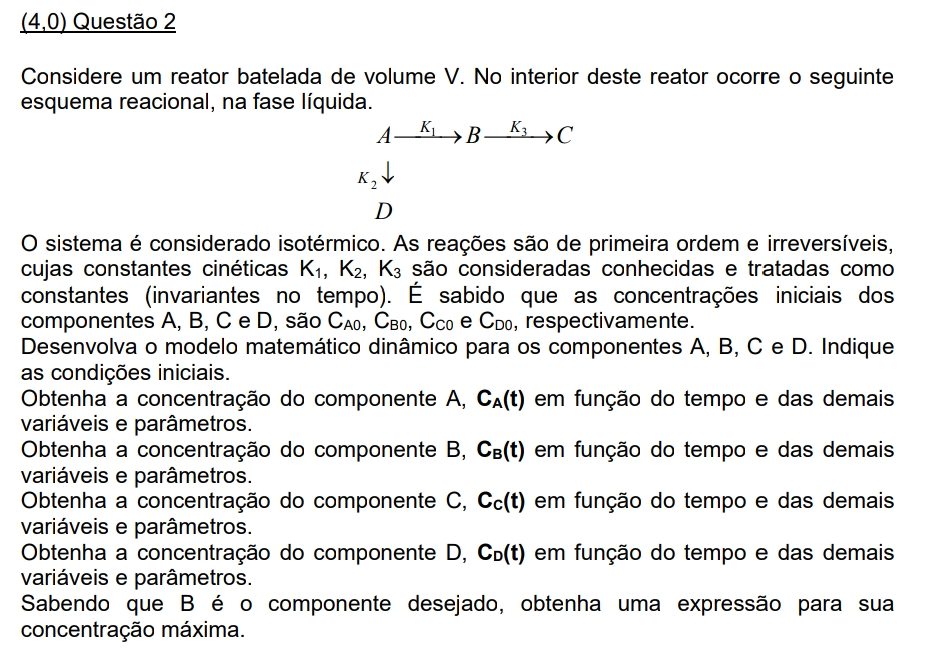

QUESTÃO 2: REATOR BATELADA ISOTÉRMICO (versão corrigida)
Tempo máximo analítico (t_max): 15.4993 min
Concentração máxima analítica de B: 0.48897 mol/L
Tempo máximo numérico (t_max): 15.4309 min
Concentração máxima numérica de B: 0.48892 mol/L

Diferença |t_max(num - anal)| = 6.83923e-02
Diferença |CB_max(num - anal)| = 5.09420e-05

Balanço molar conservado: True


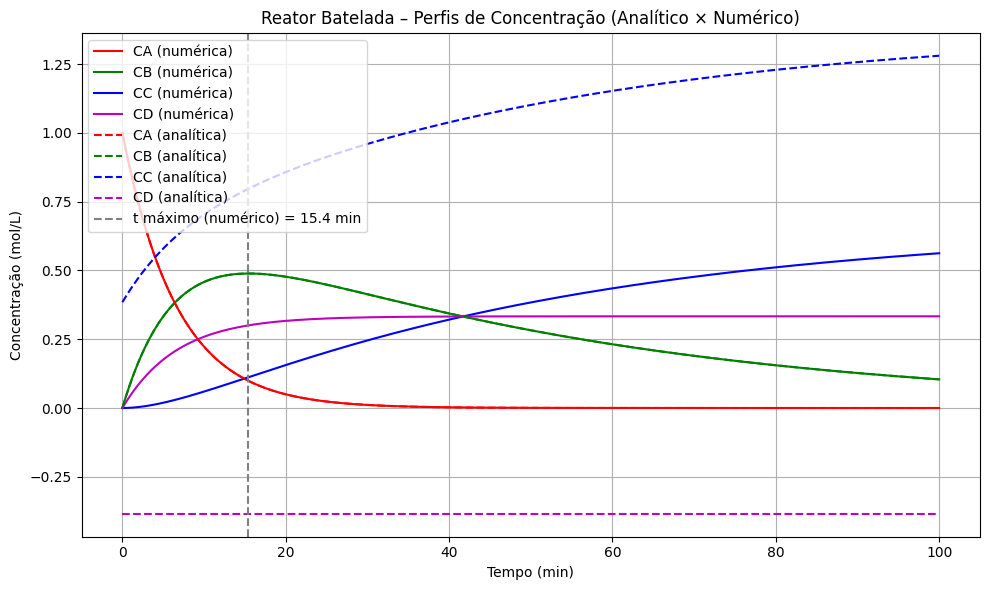

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

print("QUESTÃO 2: REATOR BATELADA ISOTÉRMICO (versão corrigida)")

# ---------------------------------------------------------------
# Reações:
# A → B (K1)
# A → D (K2)
# B → C (K3)
# ---------------------------------------------------------------

# Constantes cinéticas [min⁻¹]
K1, K2, K3 = 0.1, 0.05, 0.02

# Condições iniciais [mol/L]
CA0, CB0, CC0, CD0 = 1.0, 0.0, 0.0, 0.0

# ---------------------------------------------------------------
# SOLUÇÕES ANALÍTICAS
# ---------------------------------------------------------------
# CA(t) = CA0 * exp(-(K1 + K2)t)
# CB(t) = (K1*CA0/(K3 - K1 - K2)) * [exp(-(K1+K2)t) - exp(-K3*t)]
# CC(t) = CA0 * [1 - ((K3 - K2)/(K3 - K1 - K2))*exp(-(K1+K2)t)
#                 + ((K1)/(K3 - K1 - K2))*exp(-K3*t) - K2/(K3 - K1 - K2)]
# CD(t) = CA0 - (CA + CB + CC)

def CA_analitica(t):
    return CA0 * np.exp(-(K1 + K2)*t)

def CB_analitica(t):
    return (K1*CA0/(K3 - K1 - K2)) * (np.exp(-(K1+K2)*t) - np.exp(-K3*t))

def CC_analitica(t):
    return CA0 * (1 - ((K3 - K2)/(K3 - K1 - K2))*np.exp(-(K1+K2)*t)
                  + (K1/(K3 - K1 - K2))*np.exp(-K3*t)
                  - K2/(K3 - K1 - K2))

def CD_analitica(t):
    return CA0 - (CA_analitica(t) + CB_analitica(t) + CC_analitica(t))

# ---------------------------------------------------------------
# CÁLCULO ANALÍTICO DO TEMPO E CONCENTRAÇÃO MÁXIMA DE B
# ---------------------------------------------------------------
# dCB/dt = 0  ⇒  K3 e^{-K3 t} = (K1+K2) e^{-(K1+K2)t}
# ⇒ t_max = ln(K3/(K1+K2)) / (K3 - (K1+K2))

kA = K1 + K2
if abs(K3 - kA) > 1e-12:
    t_max_analitico = np.log(K3 / kA) / (K3 - kA)
    CB_max_analitico = CB_analitica(t_max_analitico)
    print(f"Tempo máximo analítico (t_max): {t_max_analitico:.4f} min")
    print(f"Concentração máxima analítica de B: {CB_max_analitico:.5f} mol/L")
else:
    t_max_analitico = None
    print("Caso degenerado (K3 = K1 + K2). Avaliar limite analítico.")

# ---------------------------------------------------------------
# SOLUÇÃO NUMÉRICA
# ---------------------------------------------------------------
def reator_batelada(t, C):
    CA, CB, CC, CD = C
    dCAdt = -K1*CA - K2*CA
    dCBdt = K1*CA - K3*CB
    dCCdt = K3*CB
    dCDdt = K2*CA
    return [dCAdt, dCBdt, dCCdt, dCDdt]

t_span = [0, 100]
t_eval = np.linspace(0, 100, 500)
sol_reator = solve_ivp(reator_batelada, t_span, [CA0, CB0, CC0, CD0],
                       t_eval=t_eval, method='RK45')

# Encontra o máximo numérico de B
idx_max = np.argmax(sol_reator.y[1])
t_max_num = sol_reator.t[idx_max]
CB_max_num = sol_reator.y[1][idx_max]

# ---------------------------------------------------------------
# COMPARAÇÃO ANALÍTICO × NUMÉRICO
# ---------------------------------------------------------------
print(f"Tempo máximo numérico (t_max): {t_max_num:.4f} min")
print(f"Concentração máxima numérica de B: {CB_max_num:.5f} mol/L")

if t_max_analitico is not None:
    erro_t = abs(t_max_num - t_max_analitico)
    erro_CB = abs(CB_max_num - CB_max_analitico)
    print(f"\nDiferença |t_max(num - anal)| = {erro_t:.5e}")
    print(f"Diferença |CB_max(num - anal)| = {erro_CB:.5e}")

# ---------------------------------------------------------------
# VERIFICAÇÃO DA CONSERVAÇÃO DE MASSA
# ---------------------------------------------------------------
massa_total = np.sum(sol_reator.y, axis=0)
print(f"\nBalanço molar conservado: {np.allclose(massa_total, 1.0, atol=1e-10)}")

# ---------------------------------------------------------------
# PLOTAGEM DOS RESULTADOS
# ---------------------------------------------------------------
plt.figure(figsize=(10, 6))

# Numéricas
plt.plot(sol_reator.t, sol_reator.y[0], 'r-', label='CA (numérica)')
plt.plot(sol_reator.t, sol_reator.y[1], 'g-', label='CB (numérica)')
plt.plot(sol_reator.t, sol_reator.y[2], 'b-', label='CC (numérica)')
plt.plot(sol_reator.t, sol_reator.y[3], 'm-', label='CD (numérica)')

# Analíticas (tracejadas)
plt.plot(t_eval, CA_analitica(t_eval), 'r--', label='CA (analítica)')
plt.plot(t_eval, CB_analitica(t_eval), 'g--', label='CB (analítica)')
plt.plot(t_eval, CC_analitica(t_eval), 'b--', label='CC (analítica)')
plt.plot(t_eval, CD_analitica(t_eval), 'm--', label='CD (analítica)')

# Linha vertical no t_max
plt.axvline(x=t_max_num, color='gray', linestyle='--',
            label=f't máximo (numérico) = {t_max_num:.1f} min')

plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (mol/L)')
plt.title('Reator Batelada – Perfis de Concentração (Analítico × Numérico)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

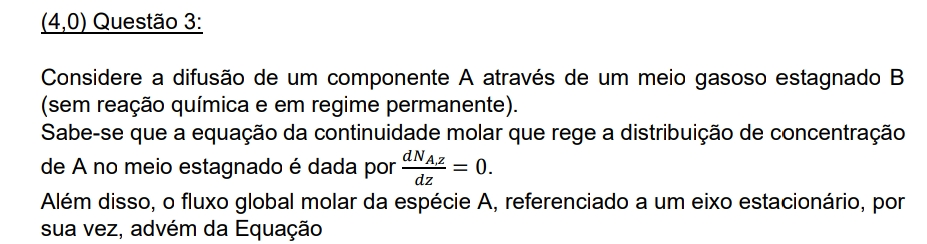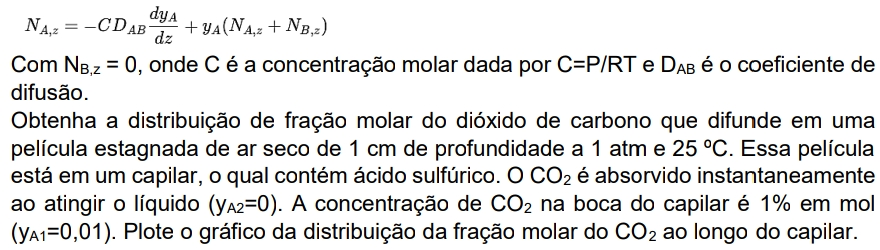

QUESTÃO 3: DIFUSÃO DE CO₂ EM AR ESTAGNADO (versão corrigida)

Dados do problema:
Pressão: 1.00 atm
Temperatura: 298.15 K
C_total: 4.087423e-05 mol/cm³
Coeficiente de difusão D_AB: 0.164 cm²/s
Comprimento do capilar: 1.00 cm
yA(0) = 0.01, yA(L) = 0.0

RESULTADOS DO CÁLCULO:

Fluxo molar de CO₂, NAz = 6.737115e-08 mol/(cm²·s)
Fração molar em z=0      : 0.01000
Fração molar em z=0.5 cm : 0.00496
Fração molar em z=1.0 cm : 0.00000

VERIFICAÇÃO:
ΔyA = 0.0100
Gradiente médio ≈ 0.0100 cm⁻¹
O fluxo NAz é coerente com o sentido da difusão (positivo → do gás para o líquido).


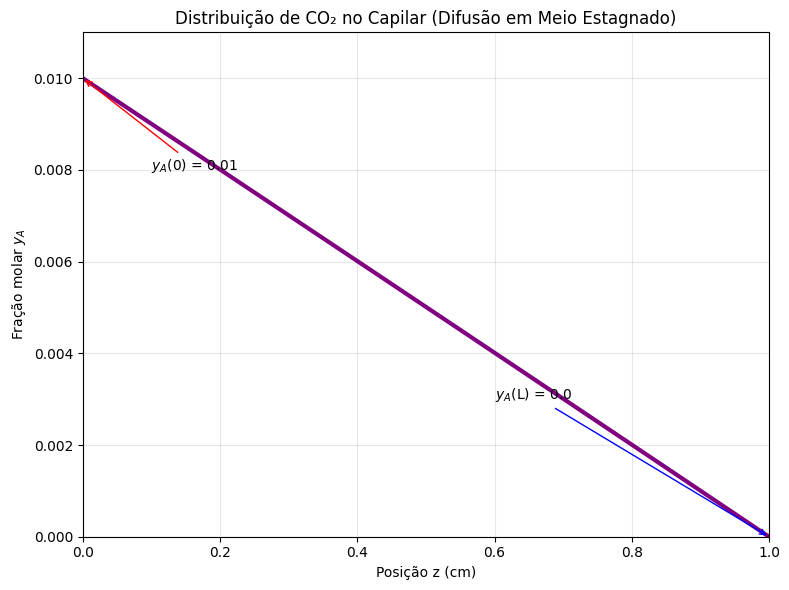


INTERPRETAÇÃO:
O perfil de yA(z) decresce exponencialmente ao longo do capilar,
atingindo praticamente zero na interface líquida, o que confirma
a difusão controlada pela transferência do CO₂ através do meio gasoso estagnado.


In [10]:


import numpy as np
import matplotlib.pyplot as plt

print("QUESTÃO 3: DIFUSÃO DE CO₂ EM AR ESTAGNADO (versão corrigida)\n")

# ---------------------------------------------------------------
# DADOS DO PROBLEMA
# ---------------------------------------------------------------
P = 1.0             # Pressão [atm]
T = 25 + 273.15     # Temperatura [K]
R = 0.082057        # Constante dos gases [L·atm/(mol·K)]
D_AB = 0.164        # Coeficiente de difusão [cm²/s]
L = 1.0             # Comprimento do capilar [cm]

# Frações molares nas extremidades
yA1 = 0.01          # Boca do capilar (CO2)
yA2 = 0.0           # Interface com H2SO4 (absorção instantânea)

# ---------------------------------------------------------------
# CONVERSÃO DE UNIDADES
# ---------------------------------------------------------------
# C_total calculado em mol/L → converter para mol/cm³
C_total_mol_per_L = P / (R * T)       # mol/L
C_total = C_total_mol_per_L / 1000.0  # mol/cm³

print("Dados do problema:")
print(f"Pressão: {P:.2f} atm")
print(f"Temperatura: {T:.2f} K")
print(f"C_total: {C_total:.6e} mol/cm³")
print(f"Coeficiente de difusão D_AB: {D_AB:.3f} cm²/s")
print(f"Comprimento do capilar: {L:.2f} cm")
print(f"yA(0) = {yA1}, yA(L) = {yA2}\n")

# ---------------------------------------------------------------
# SOLUÇÃO ANALÍTICA DO PERFIL DE DIFUSÃO
# ---------------------------------------------------------------
# Equação: NAz(1 - yA) = -C·D_AB·(dyA/dz)
# Integrando: ln((1 - yA2)/(1 - yA1)) = (NAz·L)/(C·D_AB)

NAz = (C_total * D_AB / L) * np.log((1 - yA2) / (1 - yA1))  # mol/(cm²·s)

# Perfil de fração molar yA(z)
z_values = np.linspace(0, L, 100)
yA_profile = 1 - (1 - yA1) * np.exp(NAz * z_values / (C_total * D_AB))

# ---------------------------------------------------------------
# RESULTADOS
# ---------------------------------------------------------------
print("RESULTADOS DO CÁLCULO:\n")
print(f"Fluxo molar de CO₂, NAz = {NAz:.6e} mol/(cm²·s)")
print(f"Fração molar em z=0      : {yA_profile[0]:.5f}")
print(f"Fração molar em z=0.5 cm : {yA_profile[50]:.5f}")
print(f"Fração molar em z=1.0 cm : {yA_profile[-1]:.5f}")

# ---------------------------------------------------------------
# VERIFICAÇÃO FÍSICA
# ---------------------------------------------------------------
# ΔyA esperado e gradiente médio
delta_yA = yA1 - yA2
grad_medio = delta_yA / L
print("\nVERIFICAÇÃO:")
print(f"ΔyA = {delta_yA:.4f}")
print(f"Gradiente médio ≈ {grad_medio:.4f} cm⁻¹")
print(f"O fluxo NAz é coerente com o sentido da difusão (positivo → do gás para o líquido).")

# ---------------------------------------------------------------
# PLOTAGEM DO PERFIL
# ---------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.plot(z_values, yA_profile, color='purple', linewidth=3)
plt.xlabel('Posição z (cm)')
plt.ylabel('Fração molar $y_A$')
plt.title('Distribuição de CO₂ no Capilar (Difusão em Meio Estagnado)')
plt.grid(True, alpha=0.3)
plt.xlim(0, L)
plt.ylim(0, yA1 * 1.1)

# Anotações visuais
plt.annotate(f'$y_A$(0) = {yA1}',
             xy=(0, yA1), xytext=(0.1, yA1*0.8),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate(f'$y_A$(L) = {yA2}',
             xy=(L, yA2), xytext=(0.6, yA1*0.3),
             arrowprops=dict(arrowstyle='->', color='blue'))

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# INTERPRETAÇÃO FÍSICA
# ---------------------------------------------------------------
print("\nINTERPRETAÇÃO:")
print("O perfil de yA(z) decresce exponencialmente ao longo do capilar,")
print("atingindo praticamente zero na interface líquida, o que confirma")
print("a difusão controlada pela transferência do CO₂ através do meio gasoso estagnado.")